In [1]:
import scipy.integrate as itg
import numpy as np
import math
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [10]:
## First

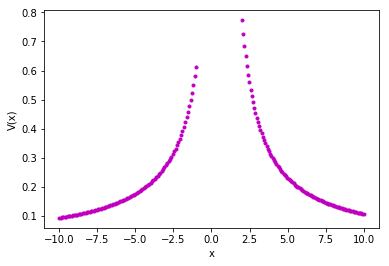

In [2]:
x1 = np.linspace(-10, -1, 100)
x2 = np.linspace(2, 10, 100)
v1 = list(map(lambda x: itg.quad(lambda charge_x: 2*charge_x/abs(x-charge_x), 0, 1)[0], x1))
v2 = list(map(lambda x: itg.quad(lambda charge_x: 2*charge_x/abs(x-charge_x), 0, 1)[0], x2))

plt.plot(x1, v1,'m.', x2, v2,'m.')
plt.xlabel('x')
plt.ylabel('V(x)')
plt.show()

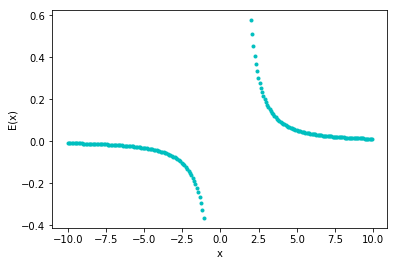

In [3]:
# Electric field
E1 = -np.diff(v1)/np.diff(x1)
E2 = -np.diff(v2)/np.diff(x2)
plt.plot(x1[:-1], E1, 'c.', x2[:-1], E2, 'c.')
plt.xlabel('x')
plt.ylabel('E(x)')
plt.show()

In [ ]:
## Second

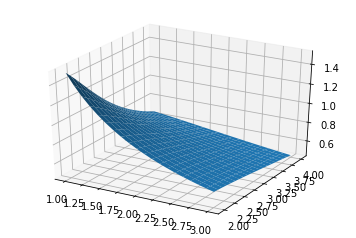

In [4]:
x = np.linspace(1, 3, 20)
y = np.linspace(2, 4, 20)

def v(x, y):
    fx = itg.quad(lambda charge_x: charge_x**2/math.sqrt((x-charge_x)**2+y**2), 0, 1)[0]
    fy = itg.quad(lambda charge_y: charge_y/math.sqrt(x**2+(y-charge_y)**2), 1, 2)[0]
    return fx+fy
    
f = np.vectorize(v)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)


ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()


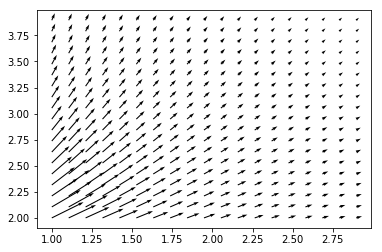

In [6]:
Ex = (-np.diff(Z, axis=1)/np.average(np.diff(y)))[:-1, :]
Ey = (-np.diff(Z, axis=0)/np.average(np.diff(x)))[:, :-1]

X, Y = np.meshgrid(x[:-1], y[:-1])
plt.quiver(X, Y, Ex, Ey)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [ ]:
## Third

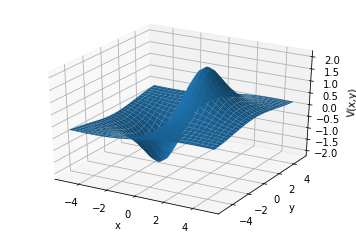

In [7]:
x = np.linspace(-5, 5, 30)
y = np.linspace(-5, 5, 30)
z = 1
        
def v(x, y, z):
    f = lambda r,phi : r**2*math.cos(phi)/math.sqrt((x-r*math.cos(phi))**2 \
                                        + (y-r*math.sin(phi))**2 + z**2)
    vv = itg.nquad(f, [[0, 2], [0, 2*math.pi]])[0]
    return vv
    
f = np.vectorize(v)
X, Y = np.meshgrid(x, y)
Z = f(X, Y, z)


ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, shade=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x,y)')
plt.show()


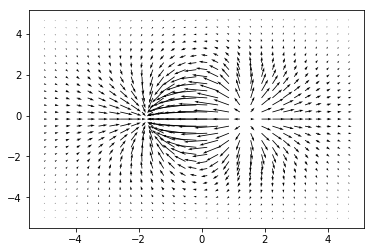

In [8]:
Ex = (-np.diff(Z, axis=1)/np.average(np.diff(y)))[:-1, :]
Ey = (-np.diff(Z, axis=0)/np.average(np.diff(x)))[:, :-1]

X, Y = np.meshgrid(x[:-1], y[:-1])
plt.quiver(X, Y, Ex, Ey)
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()